In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import os, pickle, sys
sns.set_style("ticks")
sns.set_context("poster")

# MV Strategies

## Parameters

In [2]:
import model_evaluation
me_params = {"method": "stationary_bootstrap",
             "k_fold_cv": {
                 "k": 10,
                 "init_stat": 10
             },
             "iid_bootstrap": {
                 "init_stat": 10,
                 "B": 50
             },
             "stationary_bootstrap": {
                 "init_stat": 10,
                 "B": 10,
                 "block_size": 10
             },
             "circular_bootstrap": {
                 "init_stat": 10,
                 "B": 10,
                 "block_size": 10
             },
             "block_bootstrap": {
                 "init_stat": 10,
                 "B": 10,
                 "block_size": 10
             },
             "naive": {

             },
             "holdout_end": {
                 "holdout_size": 20
             },
             "window_based": {
                 "warmup_period": 10,
                 "test_size": 10,
                 "stride_size": 0
             },
             "block_cv": {
                 "test_size": 20
             },
             "partitioned_cv": {
                 "init_stat": 10,
                 "subset_size": 10,
                 "test_perc": 20
             },
             "hvblock_cv": {
                 "test_size": 10,
                 "gap_size": 10
             },
             "markov_cv": {
                 "gap_size": 5
             },
             "combsym_cv":{
                 "splits": 4
             }
             }

## MV Charts

Text(0.5,1.15,'stationary_bootstrap')

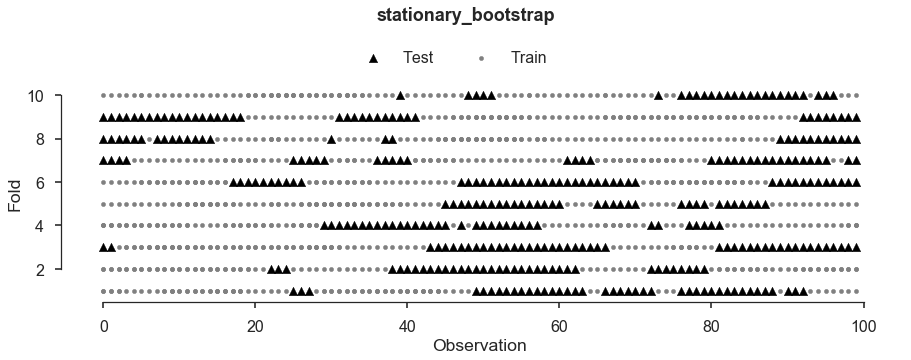

In [3]:
# dataset idx
n = 100
idx = np.array(list(range(n)))
mv_api = model_evaluation.ModelEvaluation(idx, me_params)

# image
fig, ax = plt.subplots(figsize = (15, 4))
for i in range(mv_api.max_iters):
    mv_sets = mv_api[i]
    ax.scatter(x = idx[mv_sets["test_" + str(i)]], y = np.array([i+1]*n)[mv_sets["test_" + str(i)]], 
               c = "black", marker = "^", s = 70.0)
    ax.scatter(x = idx[mv_sets["train_" + str(i)]], y = np.array([i+1]*n)[mv_sets["train_" + str(i)]], 
               c = "gray", marker = ".", s = 70.0)
    ax.set_ylabel("Fold")
    ax.set_xlabel("Observation")
    ax.set_ylim(bottom=.5, top=mv_api.max_iters+.5)

# final adjustments
sns.despine(fig, ax=ax, top=True, right=True, left=False, bottom=False, offset=None, trim=True)
fig.legend(("Test", "Train"), loc=(.5, .5), bbox_to_anchor=(0.325, 1.), ncol=2, fancybox=True, shadow=True,)
fig.suptitle(mv_api.me_method_label, fontsize=18, fontweight='bold', y = 1.15)